In [3]:
#Ensure we are using the right kernel
print (sc.version)

3.0.1


In [4]:
import os
import shutil
# import sh
from pyspark.sql.functions import *
#from pyspark.sql import functions as F
from pyspark.sql.types import *
from datetime import datetime
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.cloud import storage

In [6]:
# List all files in given COS directory
def list_blobs(bucket_name, folder_name):
    gcs_client = storage.Client()
    bucket = gcs_client.bucket(bucket_name)
    blobs = list(bucket.list_blobs(prefix=folder_name))

    for blob in blobs:
        print(blob.name + '\t' + str(blob.size))

In [7]:
# Delete folder from COS bucket
def delete_folder(bucket_name, folder_name):
    gcs_client = storage.Client()
    bucket = gcs_client.bucket(bucket_name)
    blobs = list(bucket.list_blobs(prefix=folder_name))

    for blob in blobs:
        blob.delete()

In [8]:
# Reading data from open bucket, avaible to all students
bucket_read = 'msca-bdp-amazon'

# Saving results into individual bucket, students must update to their own bucket
bucket_write = 'msca-bdp-students-bucket/shared_data/bharadwajk'

In [9]:
list_blobs(bucket_read, 'amazon_reviews')

amazon_reviews/	0
amazon_reviews/amazon_reviews_us_Apparel_v1_00.tsv	1971061630
amazon_reviews/amazon_reviews_us_Automotive_v1_00.tsv	1350294084
amazon_reviews/amazon_reviews_us_Baby_v1_00.tsv	872274720
amazon_reviews/amazon_reviews_us_Beauty_v1_00.tsv	2152186111
amazon_reviews/amazon_reviews_us_Books_v1_00.tsv	6699171766
amazon_reviews/amazon_reviews_us_Books_v1_01.tsv	6703921864
amazon_reviews/amazon_reviews_us_Books_v1_02.tsv	3238702530
amazon_reviews/amazon_reviews_us_Camera_v1_00.tsv	1100169988
amazon_reviews/amazon_reviews_us_Digital_Ebook_Purchase_v1_00.tsv	6696964946
amazon_reviews/amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv	3224038446
amazon_reviews/amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv	628880453
amazon_reviews/amazon_reviews_us_Digital_Software_v1_00.tsv	53855391
amazon_reviews/amazon_reviews_us_Digital_Video_Download_v1_00.tsv	1288048833
amazon_reviews/amazon_reviews_us_Digital_Video_Games_v1_00.tsv	73154460
amazon_reviews/amazon_reviews_us_Electronics_v1

In [10]:
!hadoop fs -ls 'gs://msca-bdp-amazon/amazon_reviews/'

Found 46 items
-rwx------   3 root root 1971061630 2020-10-28 20:26 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Apparel_v1_00.tsv
-rwx------   3 root root 1350294084 2020-10-28 20:26 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Automotive_v1_00.tsv
-rwx------   3 root root  872274720 2020-10-28 20:26 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Baby_v1_00.tsv
-rwx------   3 root root 2152186111 2020-10-28 20:27 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Beauty_v1_00.tsv
-rwx------   3 root root 6699171766 2020-10-28 20:29 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Books_v1_00.tsv
-rwx------   3 root root 6703921864 2020-10-28 20:31 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Books_v1_01.tsv
-rwx------   3 root root 3238702530 2020-10-28 20:32 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Books_v1_02.tsv
-rwx------   3 root root 1100169988 2020-10-28 20:32 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Camera_v1_

In [11]:
path = "gs://msca-bdp-amazon/amazon_reviews/"

### Reading the file

In [12]:
amazon_reviews = spark.read.csv(path, header='true', inferSchema='true', sep='\t', quote='"')
amazon_reviews.cache()

DataFrame[marketplace: string, customer_id: int, review_id: string, product_id: string, product_parent: int, product_title: string, product_category: string, star_rating: string, helpful_votes: int, total_votes: int, vine: string, verified_purchase: string, review_headline: string, review_body: string, review_date: string]

In [13]:
amazon_reviews.show()

+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|marketplace|customer_id|     review_id|product_id|product_parent|       product_title|product_category|star_rating|helpful_votes|total_votes|vine|verified_purchase|     review_headline|         review_body|review_date|
+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|         US|   22873041|R3ARRMDEGED8RD|B00KJWQIIC|     335625766|Plemo 14-Inch Lap...|              PC|          5|            0|          0|   N|                Y|Pleasantly surprised|I was very surpri...| 2015-08-31|
|         US|   30088427| RQ28TSA020Y6J|B013ALA9LA|     671157305|TP-Link OnHub AC1...|              PC|          5|    

In [14]:
amazon_reviews.limit(10).toPandas()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,22873041,R3ARRMDEGED8RD,B00KJWQIIC,335625766,Plemo 14-Inch Laptop Sleeve Case Waterproof Fa...,PC,5,0,0,N,Y,Pleasantly surprised,I was very surprised at the high quality of th...,2015-08-31
1,US,30088427,RQ28TSA020Y6J,B013ALA9LA,671157305,TP-Link OnHub AC1900 Wireless Wi-Fi Router,PC,5,24,31,N,N,OnHub is a pretty no nonsense type router that...,I am a Google employee and had to chance to us...,2015-08-31
2,US,20329786,RUXJRZCT6953M,B00PML2GQ8,982036237,AmazonBasics USB 3.0 A Male to A Male Cable - ...,PC,1,2,2,N,N,None of them worked. No functionality at all.,"Bought cables in 3ft, 6ft and 9ft. NONE of th...",2015-08-31
3,US,14215710,R7EO0UO6BPB71,B001NS0OZ4,576587596,Transcend P8 15-in-1 USB 2.0 Flash Memory Card...,PC,1,0,0,N,Y,just keep searching.,"nope, cheap and slow",2015-08-31
4,US,38264512,R39NJY2YJ1JFSV,B00AQMTND2,964759214,Aleratec SATA Data Cable 2.0 20in Serial ATA S...,PC,5,0,0,N,Y,Five Stars,Excellent! Great value and does the job.,2015-08-31
5,US,30548466,R31SR7REWNX7CF,B00KX4TORI,170101802,Kingston Digital MobileLite G4 USB 3.0 Multi-F...,PC,5,0,0,N,Y,"Good quality, works well and compact","Good quality,works well and compact size",2015-08-31
6,US,589298,RVBP8I1R0CTZ8,B00P17WEMY,206124740,White 9 Inch Unlocked Dual Sim Card Phone Tabl...,PC,3,1,2,N,Y,in fact this is third China good. Demn s***,This demn tablet is just a Real Chinese produc...,2015-08-31
7,US,49329488,R1QF6RS1PDLU18,B00TR05L9Y,778403103,"Lenovo TAB2 A10 - 10.1"" 2-in-1 Tablet (1.5Ghz,...",PC,4,1,1,N,Y,Good,I am not sure I don't know if it is the tablet...,2015-08-31
8,US,50728290,R23AICGEDAJQL1,B0098Y77OG,177098042,Acer,PC,1,0,0,N,Y,You get what you pay for,"After exactly 45 days, the screen went dark. P...",2015-08-31
9,US,37802374,R2EY3N4K9W19UP,B00IFYEYXC,602496520,AzureWave Broadcom BCM94352HMB 802.11/ac/867Mb...,PC,5,3,4,N,Y,Great for Windows 7 Laptop!,Replaced my Intel Centrino 2230 with the BCM94...,2015-08-31


In [15]:
amazon_reviews.printSchema()

root
 |-- marketplace: string (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: integer (nullable = true)
 |-- product_title: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- star_rating: string (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: string (nullable = true)



### 1. Which product category gets most reviews


In [16]:
#Filtering for the required columns and then aggregating
amazon_reviews.select("product_category","review_id").\
groupby("product_category").\
agg(count("review_id")).orderBy(count("review_id"), ascending = False).show(5)

+--------------------+----------------+
|    product_category|count(review_id)|
+--------------------+----------------+
|               Books|        19531194|
|Digital_Ebook_Pur...|        17622381|
|            Wireless|         9001881|
|                  PC|         6908551|
|                Home|         6221537|
+--------------------+----------------+
only showing top 5 rows



 Books product category has the most number of reviews, followed Digitak Ebooks and Wireless categories

### 2. Which product category gets highest / lowest review star ratings

Casting the rating column to numeric type

In [17]:
# Casting a string into date type
amazon_reviews = amazon_reviews.withColumn("star_rating", amazon_reviews["star_rating"].cast(IntegerType()))

In [18]:
amazon_reviews.printSchema()

root
 |-- marketplace: string (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: integer (nullable = true)
 |-- product_title: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: string (nullable = true)



In [30]:
#Filtering for the required columns and then aggregating
review_ratings = amazon_reviews.select("product_category","star_rating").\
groupby("product_category").\
agg(avg("star_rating").alias("review_count")).orderBy("review_count", ascending = False)
review_ratings.show(5)

+--------------------+-----------------+
|    product_category|     review_count|
+--------------------+-----------------+
|           Gift Card|4.731363105858364|
|Digital_Music_Pur...|4.642890766134499|
|               Music| 4.43662139011773|
|               Books|4.341657709200984|
|             Grocery|4.312228738307156|
+--------------------+-----------------+
only showing top 5 rows



 Gitf card product category has the highest average star ratings i.e., the category with the highest average ratings

In [31]:
review_ratings_low = review_ratings.filter('review_count >= 1').\
orderBy("review_count", ascending = True).show(5)

+-------------------+------------------+
|   product_category|      review_count|
+-------------------+------------------+
|   Digital_Software|3.5393303553935973|
|           Software|3.5670354545215264|
|   Major Appliances|  3.71618455949887|
| Mobile_Electronics| 3.763162657775661|
|Digital_Video_Games|3.8531262248076406|
+-------------------+------------------+
only showing top 5 rows



 Digital_Software has the lowest star ratings i.e., the category with the lowest average ratings

### 3. Do you see seasonality in reviews?

In [88]:
reviews_seasonality = amazon_reviews.\
select("product_category","star_rating","review_date").\
withColumn("year", year("review_date")).\
withColumn("month", month("review_date")).\
withColumn("Dayofweek", dayofweek("review_date"))

In [89]:
## For the sake of computational purposes and consumability will identify the product categories with the highest number of reviews
product_category = reviews_seasonality. groupby('product_category').\
agg(count("star_rating").alias("review_count")).orderBy("review_count", ascending= False).limit(15)

In [90]:
product_category = product_category.select("product_category")
product_category.toPandas()

,product_category
0,Books
1,Digital_Ebook_Purchase
2,Wireless
3,PC
4,Home
5,Apparel
6,Health & Personal Care
7,Beauty
8,Video DVD
9,Mobile_Apps


In [91]:
reviews_seasonality_filtered = reviews_seasonality.where(reviews_seasonality["product_category"].isin(["Books","Digital_Ebook_Purchase",
                                                                       "Wireless","PC","Home","Apparel","Health & Personal Care",
                                                                       "Beauty","Video DVD","Mobile_Apps","Kitchen","Toys",
                                                                       "Sports","Music","Shoes"]))

    - Is every product category getting consistent number of reviews throughout the year?
    - Any product categories that are getting more reviews during certain times of the year?  If yes, which product categories and what times of the year?

In [119]:
ratings_pivot = reviews_seasonality_filtered.filter((reviews_seasonality['month']>0)).\
crosstab('month','product_category')
ratings_pivot = ratings_pivot.withColumn('month_product_category', ratings_pivot['month_product_category'].cast('int').cast('int')).\
orderBy('month_product_category', ascending = True).toPandas()
ratings_pivot

,month_product_category,Apparel,Beauty,Books,Digital_Ebook_Purchase,Health & Personal Care,Home,Kitchen,Mobile_Apps,Music,PC,Shoes,Sports,Toys,Video DVD,Wireless
0,1,593065,474604,1935472,1583173,473311,683078,566048,532562,455874,807308,417708,520689,767549,562876,898124
1,2,486445,437920,1670763,1409951,459494,557308,447674,458462,385264,638117,345011,415649,423210,452517,775361
2,3,527457,488975,1740418,1713853,502654,569031,447193,510156,417431,635630,382497,431053,386582,474175,814591
3,4,469999,441876,1575087,1564522,460343,493673,385222,413959,374499,542596,368723,387969,335358,402960,720493
4,5,471471,444126,1601946,1559783,462654,487011,383773,399236,388037,527360,369538,388051,320348,395035,717197
5,6,481833,446483,1583909,1510991,468104,498458,382357,430678,397005,520568,365062,409715,324669,382952,739281
6,7,578810,523729,1752737,1689423,551667,599110,453728,486594,417280,622735,432309,487756,401492,441804,917094
7,8,586794,538274,1793909,1715786,571321,629991,477152,469293,405534,655327,433919,498550,422803,446349,940525
8,9,304680,287540,1399667,1121422,307080,338684,275659,272510,335491,416467,266542,281532,247556,336822,533708
9,10,396549,312017,1439117,1205553,330503,368151,289350,297190,368015,429291,291076,300774,282140,349429,590598


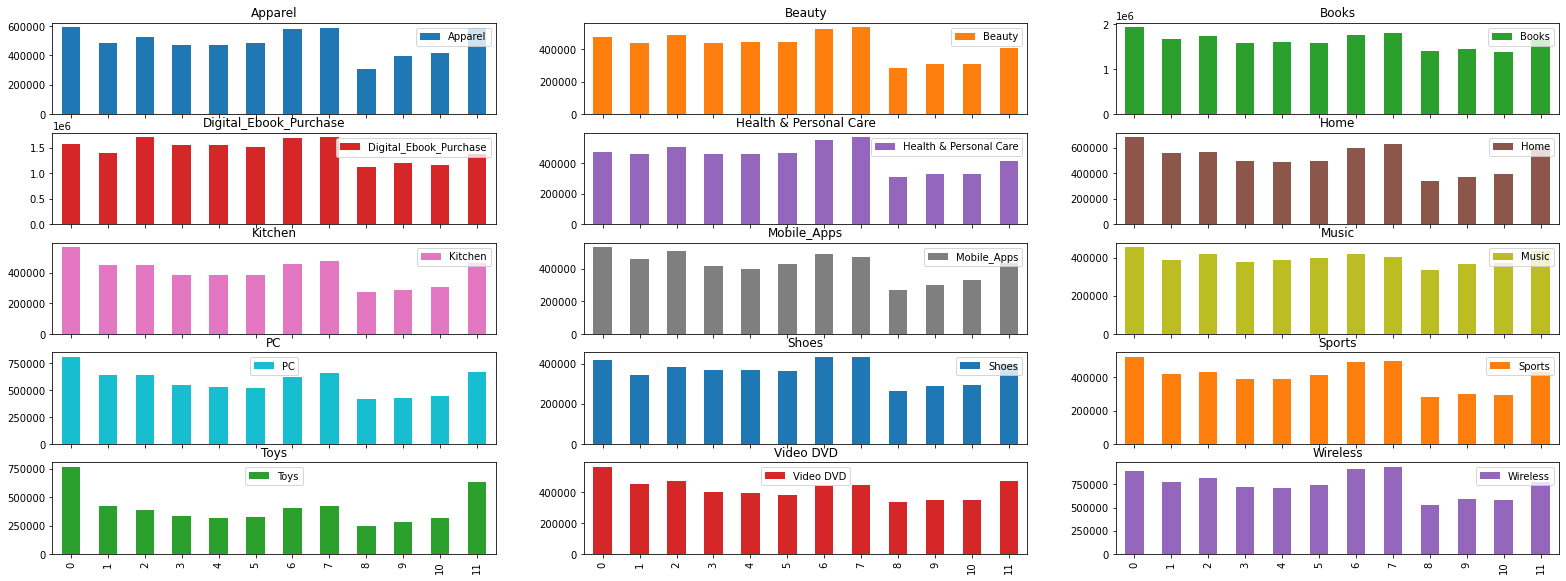

In [122]:
ratings_pivot.iloc[:,1:].plot(kind='bar',subplots=True, figsize=(27,30),layout=(15,3))
plt.show()

<AxesSubplot:xlabel='month_product_category'>

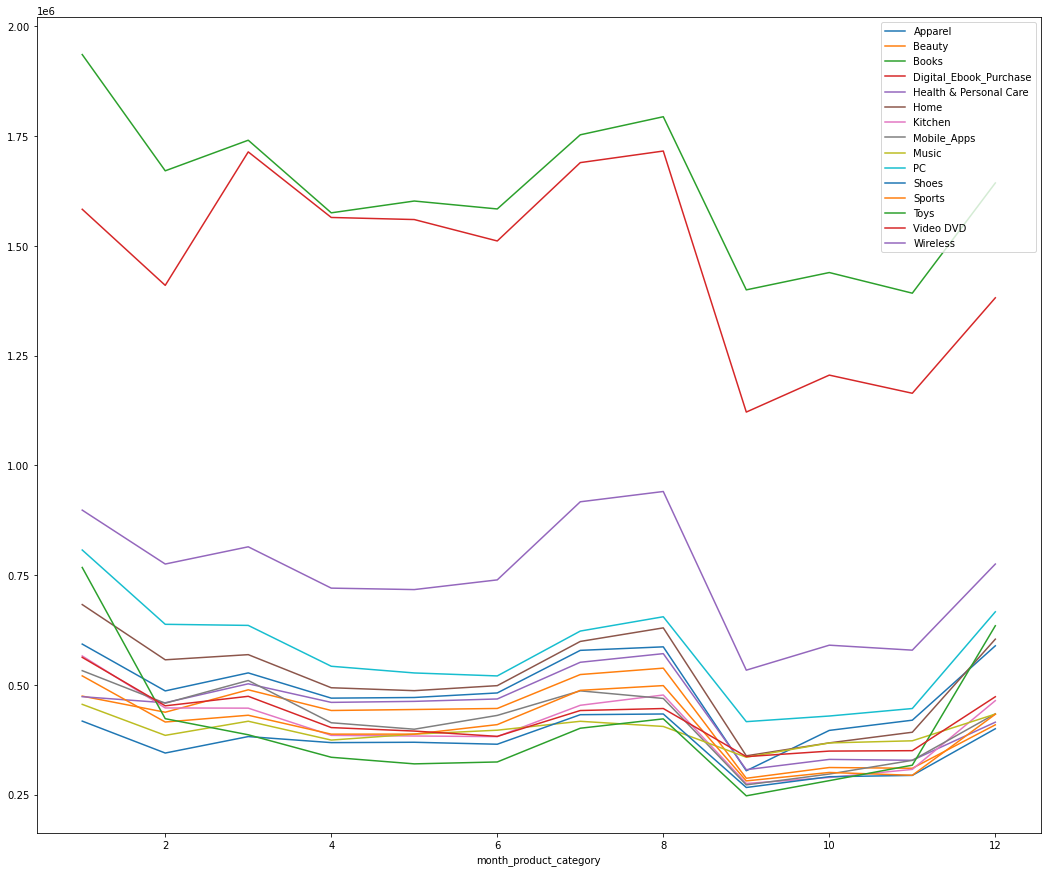

In [121]:
ratings_pivot.set_index('month_product_category').plot(figsize=[18,15])

For consumption purposes, the scope of the analysis has been restricted to top 15 product categories.

Books and Digital Ebooks have higher number of reviews when compared to other product categories. The reviews across various product categories follow a similar pattern. There is a significant increase in reviews in the months of June, July and December.

Books and Digital Ebooks has higher number of reviews compared to other products in the month of January, it may be due to the fact many people are purchasing as part of their new year resolutions.
Also, on closer inspection we can observe that the majority of the product categories are the categories that can be gifted to others. So, it can be assumed that customers are purchasing products of these categories as a gift to others and hence the increase in demand.

#### 4. Which reviews are getting the most helpful votes / total votes?
    - Any correlation between the length of review headline / review body (in number words) and the "helpfulness" of the review?


In [41]:
amazon_reviews.limit(1).toPandas()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,22873041,R3ARRMDEGED8RD,B00KJWQIIC,335625766,Plemo 14-Inch Laptop Sleeve Case Waterproof Fa...,PC,5,0,0,N,Y,Pleasantly surprised,I was very surprised at the high quality of th...,2015-08-31


In [42]:
amazon_review_help = amazon_reviews.select('helpful_votes','review_headline','review_body')
amazon_review_help = amazon_review_help.\
withColumn('review_headline_length', length(amazon_review_help['review_headline'])).\
withColumn('review_body_length', length(amazon_review_help['review_body']))
amazon_review_help.show()

+-------------+--------------------+--------------------+----------------------+------------------+
|helpful_votes|     review_headline|         review_body|review_headline_length|review_body_length|
+-------------+--------------------+--------------------+----------------------+------------------+
|            0|Pleasantly surprised|I was very surpri...|                    20|               279|
|           24|OnHub is a pretty...|I am a Google emp...|                    57|              4775|
|            2|None of them work...|Bought cables in ...|                    46|               276|
|            0|just keep searching.|nope, cheap and slow|                    20|                20|
|            0|          Five Stars|Excellent! Great ...|                    10|                40|
|            0|Good quality, wor...|Good quality,work...|                    36|                40|
|            1|in fact this is t...|This demn tablet ...|                    43|               138|


In [43]:
amazon_review_help.stat.corr("helpful_votes","review_headline_length")

0.03052472940762725

In [44]:
amazon_review_help.stat.corr("helpful_votes","review_body_length")

0.13625535968367217

From the above correlation numbers we can observe that there is insignificant correlation between either of the review headline and review body length to the helpful votes

    - Do you see any correlation between how many reviews a certain customer (customer_id) published and the "helpfulness" of the reviews?

In [45]:
amazon_review_help = amazon_reviews.select('customer_id','review_id','helpful_votes')
amazon_review_help = amazon_review_help.groupBy('customer_id').\
agg(count("review_id").alias("review_count"), avg("helpful_votes").alias("avg_help_votes"))

In [46]:
amazon_review_help.show(10)

+-----------+------------+-------------------+
|customer_id|review_count|     avg_help_votes|
+-----------+------------+-------------------+
|   46263557|           1|                0.0|
|   44418648|           8|               2.25|
|   34220092|           6|                0.0|
|   10770444|           3|                0.0|
|   12819130|          34|0.29411764705882354|
|   24692214|          22|                2.0|
|   51981844|          16|             0.8125|
|   43622169|           1|                0.0|
|   43097449|           2|                4.5|
|   45978717|           7|0.14285714285714285|
+-----------+------------+-------------------+
only showing top 10 rows



In [47]:
amazon_review_help.stat.corr("review_count","avg_help_votes")

-0.00018579973115726058

From the above correlation numbers we can observe that there is insignificant correlation between the number of times a customer has reviewed the product vs the helpfulness of the reviews.